# Generate logos for activation of convolutional filters
The code was adapted from https://github.com/utkuozbulak/pytorch-cnn-visualizations and makes use of [logomaker](https://github.com/jbkinney/logomaker/) to perform the plotting.

In [1]:
import sys

sys.path.append("../src/models/")
sys.path.append("../src/post-processing/")

import torch
import matplotlib.pyplot as plt

from conv_LSTM_onehot import convLSTM
from plot_conv import CNNLayerVisualization, recreate_logo

plt.rcParams["figure.figsize"] = 14, 4

## Load  neural network

In [2]:
t = 100
path_model = "../data/models/convlstm_big.pt"

pretrained_model = convLSTM(
    input_dim=4,
    out_channels=4,
    stride=5,
    hidden_dim=60,
    hidden_out=140,
    output_dim=2,
    t=t,
).cpu()

pretrained_model.load_state_dict(
    torch.load(path_model, map_location=torch.device("cpu"))
)

/home/jorge/.local/lib/python3.6/site-packages/torch/nn/modules/rnn.py:51: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


<All keys matched successfully>

## Optimized sequences for two filters

In [3]:
cnn_layer = 0
filter_pos = 0
# init objects
layer_vis_1 = CNNLayerVisualization(pretrained_model, cnn_layer, filter_pos)
layer_vis_2 = CNNLayerVisualization(pretrained_model, cnn_layer, 1)
# optimize
opt1 = layer_vis_1.visualise_layer1D(save=False)
opt2 = layer_vis_2.visualise_layer1D(save=False)

Iteration: 1 Loss: -0.03
Iteration: 2 Loss: -1.50
Iteration: 3 Loss: -2.27
Iteration: 4 Loss: -2.81
Iteration: 5 Loss: -3.33
Iteration: 6 Loss: -3.62
Iteration: 7 Loss: -3.83
Iteration: 8 Loss: -4.07
Iteration: 9 Loss: -4.23
Iteration: 10 Loss: -4.35
Iteration: 11 Loss: -4.46
Iteration: 12 Loss: -4.54
Iteration: 13 Loss: -4.58
Iteration: 14 Loss: -4.63
Iteration: 15 Loss: -4.74
Iteration: 16 Loss: -4.82
Iteration: 17 Loss: -4.88
Iteration: 18 Loss: -4.92
Iteration: 19 Loss: -4.95
Iteration: 20 Loss: -4.99
Iteration: 21 Loss: -5.03
Iteration: 22 Loss: -5.05
Iteration: 23 Loss: -5.08
Iteration: 24 Loss: -5.11
Iteration: 25 Loss: -5.14
Iteration: 26 Loss: -5.17
Iteration: 27 Loss: -5.20
Iteration: 28 Loss: -5.23
Iteration: 29 Loss: -5.24
Iteration: 30 Loss: -5.27
Iteration: 31 Loss: -5.30
Iteration: 32 Loss: -5.32
Iteration: 33 Loss: -5.34
Iteration: 34 Loss: -5.36
Iteration: 35 Loss: -5.37
Iteration: 36 Loss: -5.38
Iteration: 37 Loss: -5.40
Iteration: 38 Loss: -5.42
Iteration: 39 Loss: -

## First filter

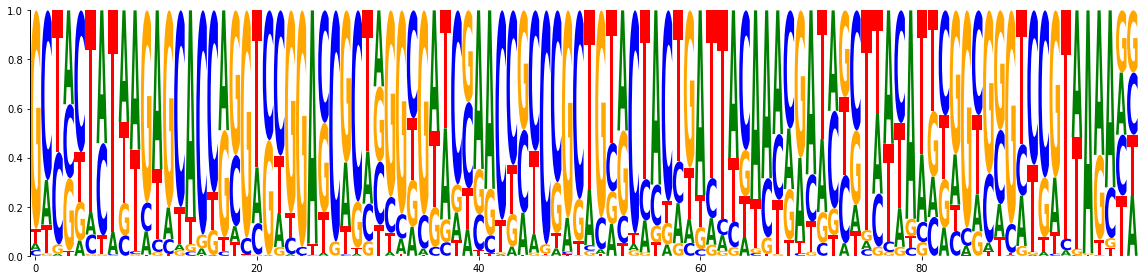

In [4]:
fig = recreate_logo(opt1)

## Second filter

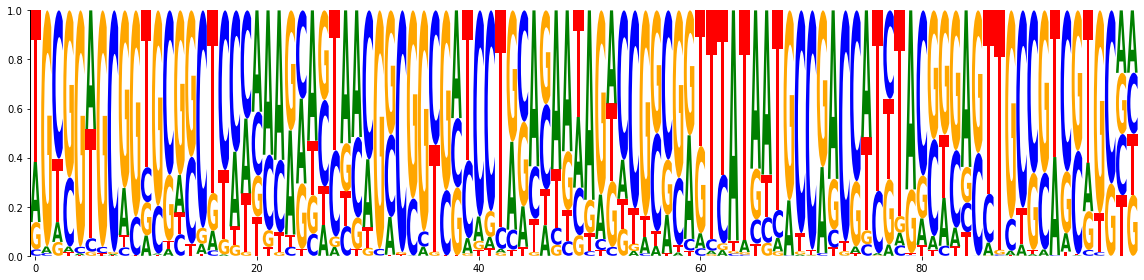

In [5]:
fig = recreate_logo(opt2)

Look a sequences of length of the kernel size

(41, 49)

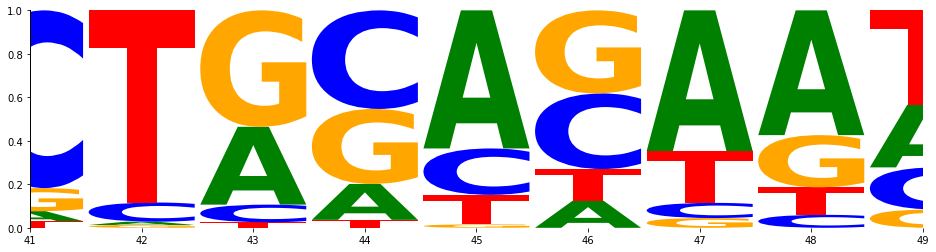

In [6]:
import pandas as pd
import numpy as np
import logomaker

im_as_var = opt2
df = pd.DataFrame(
    im_as_var[0].detach().numpy(), columns=["A", "G", "T", "C"]
)
# apply softmax to retrieve stochastic vectors
df = df.apply(lambda x: np.exp(x) / np.sum(np.exp(x)), axis=1)

fig, ax = plt.subplots(1, 1)
nn_logo = logomaker.Logo(df, ax=ax)
nn_logo.style_spines(visible=False)
nn_logo.style_spines(spines=["left"], visible=True, bounds=[0, 1])
nn_logo.ax.set_xlim([41,49])

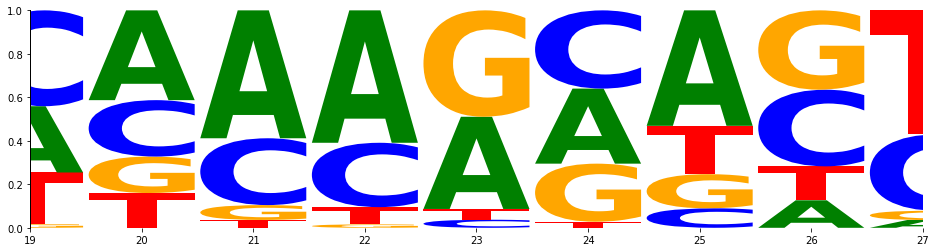

In [7]:
nn_logo.ax.set_xlim([19,27])
fig